In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv("real_fake_combo_all.csv",encoding='latin-1')
data = data.drop("Unnamed: 0", axis=1)

data.columns =['body','label']
data.head()

,body,label
0,#2816: Clinton Prideâs 8(a) Pig Farm Bridge ...,0
1,#2817: Serco's Zulu Starnet Blackmail â Clin...,0
2,Roger Stone update on Stop the Steal exit poll...,0
3,#2818: Serco's Zulu Bridge To Mumbai Pig Farm ...,0
4,Trump Advocates the American People's Control ...,0


In [3]:
pd.set_option('display.max_colwidth', 0) 
print("sample news which are fake")
print(data[data['label']==0]['body'].head(15))
print("sample news which are real")
print(data[data['label']==1]['body'].head(15))

sample news which are fake
0     #2816: Clinton Prideâs 8(a) Pig Farm Bridge â Serco Zulu Server Snuff âSoros's Patented Voter Key                                                                                                                                                                                                                                                                                                                                                                 
1     #2817: Serco's Zulu Starnet Blackmail â Clinton 8(a) Pig Farm Bridge â Soros Patent Vote                                                                                                                                                                                                                                                                                                                                                                            
2     Roger Stone update on Stop the Steal exit

In [4]:
import string
import nltk
#ps = nltk.PorterStemmer()
stopwords= nltk.corpus.stopwords.words('english')

def clean(sentence):
    s = "".join(x for x in sentence if x not in string.punctuation)
    temp = s.lower().split(' ')
    temp2 = [x for x in temp if x not in stopwords]
    return temp2
clean("hell peOople  are hOOow ! AAare ! you. enough.. are")

['hell', 'peoople', '', 'hooow', '', 'aaare', '', 'enough']

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(analyzer=clean)
vector_output = vect.fit_transform(data['body'])

print(vect.get_feature_names()[0:100])
# these numbers are the columns

['', '0', '004', '01', '02', '025', '029oz', '03', '0330', '038', '046year', '05', '06', '067', '07112016', '09hashemsfilms', '09l', '1', '10', '100', '1000', '10000', '100000', '10000000', '1000020000', '1000lbs', '1000month', '1000s', '1000times', '1000yard', '1000year', '1000â\x80\x99s', '1004429', '100day', '100k', '100mln', '100mph', '100s', '100th', '100x', '100yearold', '100â\x80\x9d', '100ð¿ñ\x80ð¾ñ\x86ðµð½ñ\x82ð½ñ\x8bð¹', '101', '101st', '10200', '102030', '1023', '102516', '102616', '10262016', '10262016aircraft', '102716', '102716â\x80¦', '10272016', '102816', '10282016', '1029', '102916', '103', '103016', '103016â\x80¦', '103116', '10312016', '103billion', '1041st', '104yearold', '105', '106', '107', '108', '109', '10abarrel', '10am', '10blade', '10game', '10hour', '10inchthick', '10m', '10mile', '10minute', '10month', '10pack', '10pound', '10s', '10th', '10to1', '10x', '10year', '10yearold', '11', '11000', '1100000', '110116', '11016', '110216', '110316', '110416', '110716

In [6]:
print(vector_output [0:10])

  (0, 18910)	0.1891586800275959
  (0, 36432)	0.19094912751938636
  (0, 24997)	0.2995547491580639
  (0, 37990)	0.2995547491580639
  (0, 31549)	0.2805026010767412
  (0, 30426)	0.2233461568327731
  (0, 37958)	0.27436917934140903
  (0, 30396)	0.28840995697230354
  (0, 37988)	0.14209936492895503
  (0, 5316)	0.23916086862389788
  (0, 12890)	0.23013146144343147
  (0, 25584)	0.24417223907432603
  (0, 1235)	0.27436917934140903
  (0, 26555)	0.2995547491580639
  (0, 7242)	0.12865496342497557
  (0, 624)	0.2995547491580639
  (1, 36425)	0.1674635900280882
  (1, 24996)	0.2625152060637444
  (1, 31737)	0.21490480780524815
  (1, 4590)	0.287360998357377
  (1, 32286)	0.3195762251525992
  (1, 30397)	0.30768654346053514
  (1, 625)	0.3195762251525992
  (1, 37958)	0.2927073160368342
  (1, 37988)	0.30319384865846405
  :	:
  (7, 35183)	0.29035040210891966
  (7, 18667)	0.0971341278486687
  (7, 25374)	0.15850147979531756
  (7, 15324)	0.13370809547978701
  (7, 37814)	0.3170029595906351
  (7, 10720)	0.1451752010544

In [7]:
pd.DataFrame(vector_output.toarray())

,0,1,2,3,4,5,6,7,8,9,...,41371,41372,41373,41374,41375,41376,41377,41378,41379,41380
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.300028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.220502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.312318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
import re
data['len'] = data['body'].apply(lambda x : len(x) - x.count(" "))
# METHOD 2  : data['len'] = data['body'].apply(lambda x : len(re.split('\s+',x)))
#print(data['body'][1]+"  - "+str(data['len'][1]))

data.head()

,body,label,len
0,#2816: Clinton Prideâs 8(a) Pig Farm Bridge â Serco Zulu Server Snuff âSoros's Patented Voter Key,0,88
1,#2817: Serco's Zulu Starnet Blackmail â Clinton 8(a) Pig Farm Bridge â Soros Patent Vote,0,78
2,"Roger Stone update on Stop the Steal exit poll program - Globalist establishment creating false expectation of a close race using fake polls, then rigging voting machines to meet that expectation - Nationalistic, constitutional, free-market awakening - Rothschild, Soros, Hillary's chances of stealing the US election are shrinking by the day - The whole system is rigged and exposed, and the American people are fed up - The elitist deviants are panicking",0,385
3,#2818: Serco's Zulu Bridge To Mumbai Pig Farm â Clinton 8(a) Patent â Obama Visa 9/11 Snuff,0,79
4,Trump Advocates the American People's Control Over U.S. Government,0,58


In [9]:
test = "Hello people this is my contact 999999999 222 888888888 20000002222"
len(re.findall('\d{7,}',test))
# for finding numbers with digits 4,5,6,7 we will write \d{4,7}
# for finding numbers with digits 7,8,9,10 .... and many more . We will write \d{7,}

3

In [17]:
data['long_number'] = data['body'].apply(lambda x : len(re.findall('\d{7,}',x)))
data['short_number'] = data['body'].apply(lambda x : len(re.findall('\d{4,6}',x)))

#data[data['label']=='spam']
#a=data.iloc[8,1]

data.head()

,body,label,len,long_number,short_number,punct,website
0,#2816: Clinton Prideâs 8(a) Pig Farm Bridge â Serco Zulu Server Snuff âSoros's Patented Voter Key,0,88,0,1,5.682,0
1,#2817: Serco's Zulu Starnet Blackmail â Clinton 8(a) Pig Farm Bridge â Soros Patent Vote,0,78,0,1,6.410,0
2,"Roger Stone update on Stop the Steal exit poll program - Globalist establishment creating false expectation of a close race using fake polls, then rigging voting machines to meet that expectation - Nationalistic, constitutional, free-market awakening - Rothschild, Soros, Hillary's chances of stealing the US election are shrinking by the day - The whole system is rigged and exposed, and the American people are fed up - The elitist deviants are panicking",0,385,0,0,3.377,0
3,#2818: Serco's Zulu Bridge To Mumbai Pig Farm â Clinton 8(a) Patent â Obama Visa 9/11 Snuff,0,79,0,1,7.595,0
4,Trump Advocates the American People's Control Over U.S. Government,0,58,0,0,5.172,0


In [11]:
import string
def count_punct (text):
    count = sum([1 for x in text if x in string.punctuation])
    pp = round(100*count/(len(text)-text.count(" ")),3)
    return pp

data['punct'] = data['body'].apply(lambda x : count_punct(x))

testlink = "hello buddwwy http how com are you.co ww ww."

def  website (text):
    if (len(re.findall('www|http|com|\.co',text))>0):
        return 1
    else:
        return 0

#pd.set_option('display.max_colwidth', 0) 
#pd.DataFrame(data[data['label']=='spam']['body'])
print(website(testlink))
data['website'] = data['body'].apply(lambda x : website(x))
#pd.DataFrame(data[data['label']=='spam'])

1


C:\Users\jason\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


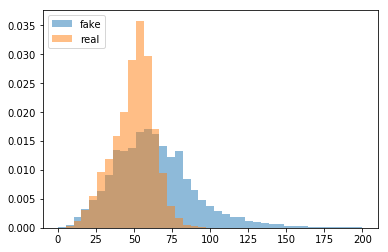

In [12]:
# how do they look like ? 
#1 len
from matplotlib import pyplot
%matplotlib inline
pyplot.figure()

bins = np.linspace(0,200,num=40)
pyplot.hist(data[data['label']==0]['len'],bins,alpha=0.5,label='fake',normed=True)
pyplot.hist(data[data['label']==1]['len'],bins,alpha =0.5,label ='real', normed=True)
pyplot.legend(loc ='upper left')
pyplot.show()

C:\Users\jason\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<function matplotlib.pyplot.show(*args, **kw)>

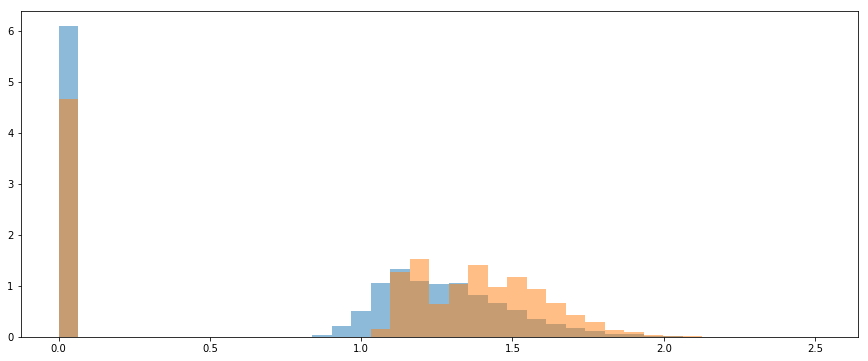

In [13]:
# punctuation 
pyplot.figure(figsize=(15,6))
i=4
bins = np.linspace(0,40**(1/i),num=40)
pyplot.hist(data[data['label']==0]['punct']**(1/i),bins,normed=True,label ='fake',alpha=0.5)
pyplot.hist(data[data['label']==1]['punct']**(1/i),bins, normed = True, label='real',alpha=0.5)
pyplot.show

#using box cox transformation to see if the data reveal distinction

ValueError: 'label' must be of length 'x'

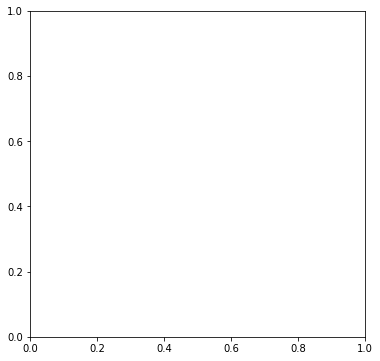

In [14]:
pyplot.figure(figsize=(6,6))
pyplot.pie(data[data['label']==0]['long_number'].value_counts(),labels=['0','1','2','3'], 
           colors=['#5f675c','#197632','#6cdfdc','blue'],)
pyplot.title("fake - long numbers")
pyplot.show()


pyplot.figure(figsize=(6,6))
pyplot.pie(data[data['label']==0]['long_number'].value_counts(),labels=['0','1'], 
           colors=['#5f675c','#197632'],)
pyplot.title("real - long numbers")
pyplot.show()

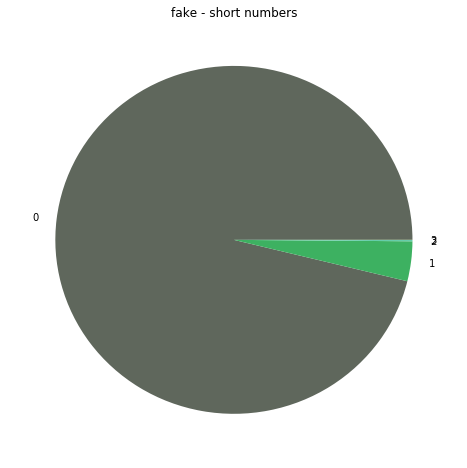

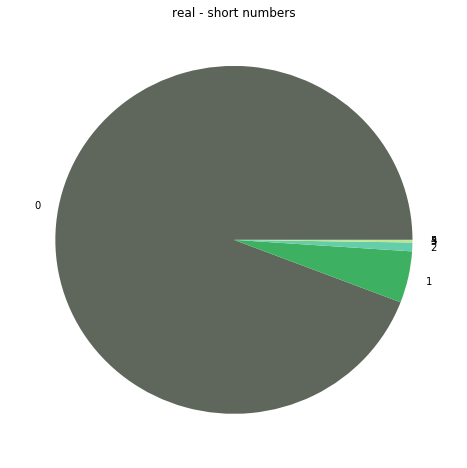

In [15]:
# short Numbers
green_pallete = ['#5f675c','#3db161','#66cdaa','#bee687','#6cdfdc','#d7d7ff','#ffdb00','white']

spam_x = data[data['label']==0]['short_number'].value_counts()
spam_x.sort_index(inplace=True)
pyplot.figure(figsize=(8,8))
pyplot.pie(spam_x,labels=spam_x.index,startangle=0,colors=green_pallete)
pyplot.title("fake - short numbers")
pyplot.show()

ham_x = data[data['label']==1]['short_number'].value_counts()
ham_x.sort_index(inplace=True)
pyplot.figure(figsize=(8,8))
pyplot.pie(ham_x,labels=ham_x.index, colors=green_pallete)
pyplot.title("real - short numbers")
pyplot.show()

In [19]:
x_features = pd.concat([data['len'],data['long_number'],data['short_number'],data['punct'],data['website'],pd.DataFrame(vector_output.toarray())],axis=1)
#,pd.DataFrame(vector_output.toarray())
#,data['long_number'],data['short_number']

MemoryError: 

In [18]:
data.head()

,body,label,len,long_number,short_number,punct,website
0,#2816: Clinton Prideâs 8(a) Pig Farm Bridge â Serco Zulu Server Snuff âSoros's Patented Voter Key,0,88,0,1,5.682,0
1,#2817: Serco's Zulu Starnet Blackmail â Clinton 8(a) Pig Farm Bridge â Soros Patent Vote,0,78,0,1,6.410,0
2,"Roger Stone update on Stop the Steal exit poll program - Globalist establishment creating false expectation of a close race using fake polls, then rigging voting machines to meet that expectation - Nationalistic, constitutional, free-market awakening - Rothschild, Soros, Hillary's chances of stealing the US election are shrinking by the day - The whole system is rigged and exposed, and the American people are fed up - The elitist deviants are panicking",0,385,0,0,3.377,0
3,#2818: Serco's Zulu Bridge To Mumbai Pig Farm â Clinton 8(a) Patent â Obama Visa 9/11 Snuff,0,79,0,1,7.595,0
4,Trump Advocates the American People's Control Over U.S. Government,0,58,0,0,5.172,0


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score

x_train, x_test, y_train, y_test = train_test_split(x_features,data['label'])
rf = RandomForestClassifier(n_estimators=100,max_depth=None,n_jobs=-1)
rf_model = rf.fit(x_train,y_train)
sorted(zip(rf_model.feature_importances_,x_train.columns),reverse=True)[0:20]

C:\Users\jason\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


NameError: name 'x_features' is not defined

In [ ]:
y_pred=rf_model.predict(x_test)
precision,recall,fscore,support =score(y_test,y_pred,pos_label='spam', average ='binary')
print('Precision : {} / Recall : {} / fscore : {} / Accuracy: {}'.format(round(precision,3),round(recall,3),round(fscore,3),round((y_pred==y_test).sum()/len(y_test),3)))